In [1]:
from tensorflow import keras

## Keras Sequential API 이용하여 이미지 분류기 만들기

### 데이터 로드

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test_full, y_test_full) = fashion_mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_train_full.dtype

dtype('uint8')

### 데이터 정규화 및 검증 세트 생성

In [5]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_full / 255.0

In [6]:
# create list of class labels
class_names = ["T_shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt",
              "Sneaker", "Bag", "Ankle boot"]

### Sequential API를 이용한 분류기 생성

In [7]:
# create sequential model using Keras API
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [8]:
model.summary()

"""
or you can visualize it with ease using the code below:

from tensorflow.keras.utils import plot_model

plot_model(model)
"""

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


'\nor you can visualize it with ease using the code below:\n\nfrom tensorflow.keras.utils import plot_model\n\nplot_model(model)\n'

In [9]:
# compile the model
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

### 모델 학습

In [10]:
# train model and evaluate accuracy
history = model.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 - 2s - loss: 0.7103 - accuracy: 0.7667 - val_loss: 0.5214 - val_accuracy: 0.8138
Epoch 2/30
1719/1719 - 1s - loss: 0.4884 - accuracy: 0.8306 - val_loss: 0.4716 - val_accuracy: 0.8328
Epoch 3/30
1719/1719 - 1s - loss: 0.4434 - accuracy: 0.8445 - val_loss: 0.4252 - val_accuracy: 0.8584
Epoch 4/30
1719/1719 - 1s - loss: 0.4156 - accuracy: 0.8556 - val_loss: 0.4091 - val_accuracy: 0.8618
Epoch 5/30
1719/1719 - 1s - loss: 0.3945 - accuracy: 0.8630 - val_loss: 0.4203 - val_accuracy: 0.8472
Epoch 6/30
1719/1719 - 1s - loss: 0.3780 - accuracy: 0.8670 - val_loss: 0.3784 - val_accuracy: 0.8676
Epoch 7/30
1719/1719 - 1s - loss: 0.3640 - accuracy: 0.8718 - val_loss: 0.3636 - val_accuracy: 0.8714
Epoch 8/30
1719/1719 - 1s - loss: 0.3531 - accuracy: 0.8755 - val_loss: 0.3476 - val_accuracy: 0.8788
Epoch 9/30
1719/1719 - 1s - loss: 0.3429 - accuracy: 0.8783 - val_loss: 0.3748 - val_accuracy: 0.8702
Epoch 10/30
1719/1719 - 1s - loss: 0.3333 - accuracy: 0.8805 - val_loss: 0.3415 - 

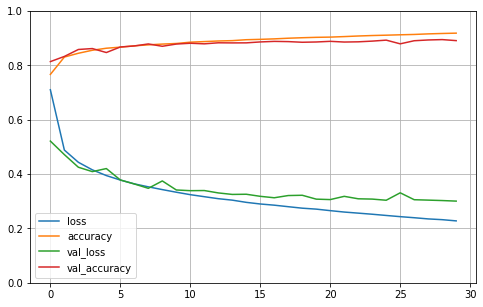

In [17]:
# plot learning curve
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### 모델 평가 (테스트 세트에 대한 검증)

In [18]:
# evaluate the model on the test data
model.evaluate(X_test, y_test_full)

313/313 [==============================] - 0s 603us/step - loss: 0.3358 - accuracy: 0.8794


[0.3357910215854645, 0.8794000148773193]

## Keras Sequential API 이용하여 회귀용 MLP 만들기

### 캘리포니아 집값 데이터셋 로드 및 전처리

In [19]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# download and load data
housing = fetch_california_housing()

# split the whole dataset into train/test
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)

# create validation set
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

# scale the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

### 모델 생성 및 훈련

데이터에 잡음이 많기 때문에 과대적합을 방지하는 차원에서 은닉층을 하나로 설정했다.

In [20]:
# create a model and compile it
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer="sgd")

In [22]:
# train the model and evaluate accuracy on validation set
history = model.fit(X_train, y_train, epochs=20,
                   validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 0s 720us/step - loss: 0.3834 - val_loss: 0.3872
Epoch 2/20
363/363 [==============================] - 0s 595us/step - loss: 0.3819 - val_loss: 0.3880
Epoch 3/20
363/363 [==============================] - 0s 622us/step - loss: 0.3773 - val_loss: 0.3881
Epoch 4/20
363/363 [==============================] - 0s 604us/step - loss: 0.3790 - val_loss: 0.4132
Epoch 5/20
363/363 [==============================] - 0s 613us/step - loss: 0.3757 - val_loss: 0.3848
Epoch 6/20
363/363 [==============================] - 0s 614us/step - loss: 0.3721 - val_loss: 0.3758
Epoch 7/20
363/363 [==============================] - 0s 596us/step - loss: 0.3683 - val_loss: 0.3870
Epoch 8/20
363/363 [==============================] - 0s 600us/step - loss: 0.3709 - val_loss: 0.3792
Epoch 9/20
363/363 [==============================] - 0s 602us/step - loss: 0.3660 - val_loss: 0.3969
Epoch 10/20
363/363 [==============================] - 0s 600us/step - loss: 0.367

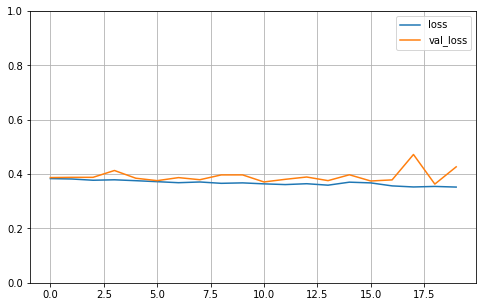

In [23]:
# draw learning curve
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### 모델 평가 (테스트 세트에 대한 검증)

In [24]:
# calculate MSE
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 422us/step - loss: 0.3712


### Keras Functional API 이용하여 회귀용 MLP 만들기

Sequential API는 사용하기 편리하지만, 경우에 따라 단순히 순차적으로 데이터를 통과시키는 신경망만으로는 해결할 수 없는 문제들도 있다.  
보다 자유로운 모델 수정을 위해 케라스는 함수형 API도 제공한다.

In [25]:
# single input, single output
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [27]:
# multiple input, single output
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [28]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [29]:
# split data to match the dimension of input
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [30]:
# fit model
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                   validation_data=((X_valid_A, X_valid_B), y_valid))

Epoch 1/20
363/363 [==============================] - 1s 894us/step - loss: 3.6390 - val_loss: 1.0538
Epoch 2/20
363/363 [==============================] - 0s 663us/step - loss: 0.9087 - val_loss: 0.7863
Epoch 3/20
363/363 [==============================] - 0s 660us/step - loss: 0.7106 - val_loss: 0.7006
Epoch 4/20
363/363 [==============================] - 0s 688us/step - loss: 0.6514 - val_loss: 0.6489
Epoch 5/20
363/363 [==============================] - 0s 661us/step - loss: 0.5960 - val_loss: 0.6116
Epoch 6/20
363/363 [==============================] - 0s 714us/step - loss: 0.5774 - val_loss: 0.5877
Epoch 7/20
363/363 [==============================] - 0s 671us/step - loss: 0.5286 - val_loss: 0.5644
Epoch 8/20
363/363 [==============================] - 0s 660us/step - loss: 0.5491 - val_loss: 0.5478
Epoch 9/20
363/363 [==============================] - 0s 681us/step - loss: 0.5215 - val_loss: 0.5342
Epoch 10/20
363/363 [==============================] - 0s 670us/step - loss: 0.510

In [31]:
# evaluate the model on test data
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

162/162 [==============================] - 0s 495us/step - loss: 0.4474
